# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [15]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [16]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [24]:
target = fraud["fraud"]
features = fraud.drop(columns = ["fraud"])
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 0)
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
normalizer = RobustScaler()
#normalizer = StandardScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
760648,3.519852,0.989143,0.634210,1.0,1.0,0.0,1.0
79333,39.223619,0.026811,0.605798,1.0,1.0,0.0,1.0
771344,55.388912,0.967727,0.464450,1.0,0.0,0.0,1.0
179102,0.596065,0.538530,0.530195,0.0,1.0,0.0,0.0
75318,22.104917,0.027621,0.661428,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
963395,71.140002,3.107909,0.121555,1.0,0.0,0.0,1.0
117952,3.350111,12.997403,2.123634,1.0,0.0,0.0,1.0
435829,26.807084,4.409678,0.484273,1.0,0.0,1.0,0.0
305711,12.144343,0.040844,1.792877,1.0,0.0,0.0,1.0


<Axes: xlabel='fraud', ylabel='Count'>

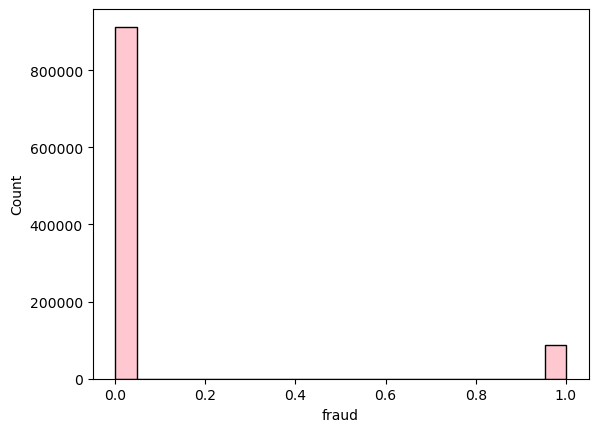

In [18]:
sns.histplot(data = fraud["fraud"], color = "lightpink")

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

log_reg = LogisticRegression()
log_reg.fit(X_train_norm, y_train)
pred = log_reg.predict(X_test_norm)
y_test = y_test.astype(int)
pred = (pred > 0.5).astype(int)


# Calculate Accuracy
print("Accuracy", log_reg.score(X_test_norm, y_test))
# Calculate precision
print(f"Precision: {precision_score(y_test, pred)}")
# Calculate recall
print(f'Recall: {recall_score(y_test, pred)}')
print(classification_report(y_test, y_pred))

Accuracy 0.959145
Precision: 0.8918849948962232
Recall: 0.6031061259706644
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    182615
           1       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [28]:
#OVER

from sklearn.utils import resample

train = pd.DataFrame(X_train_norm, columns = X_train.columns)
train


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.294764,-0.003235,-0.224026,0.0,1.0,0.0,0.0
1,1.337525,-0.318212,-0.241569,0.0,1.0,0.0,0.0
2,2.076563,-0.010245,-0.328850,0.0,0.0,0.0,0.0
3,-0.428432,-0.150724,-0.288254,-1.0,1.0,0.0,-1.0
4,0.554900,-0.317947,-0.207219,0.0,1.0,0.0,-1.0
...,...,...,...,...,...,...,...
799995,2.796665,0.690249,-0.540584,0.0,0.0,0.0,0.0
799996,-0.302524,3.927139,0.695676,0.0,0.0,0.0,0.0
799997,0.769872,1.116326,-0.316610,0.0,0.0,1.0,-1.0
799998,0.099527,-0.313619,0.491438,0.0,0.0,0.0,0.0


In [29]:
train["fraud"] = y_train.values

In [30]:
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [36]:
yes_fraud_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [37]:
train_over = pd.concat([yes_fraud_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
779963,-0.308513,3.175240,5.274617,0.0,0.0,0.0,0.0,1.0
496591,10.437579,0.515923,1.123615,0.0,0.0,0.0,0.0,1.0
485804,0.912435,0.766849,2.898212,0.0,1.0,0.0,0.0,1.0
522876,-0.404904,2.166047,1.974671,-1.0,0.0,0.0,-1.0,1.0
241477,7.253231,0.444604,-0.436666,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
799995,2.796665,0.690249,-0.540584,0.0,0.0,0.0,0.0,0.0
799996,-0.302524,3.927139,0.695676,0.0,0.0,0.0,0.0,0.0
799997,0.769872,1.116326,-0.316610,0.0,0.0,1.0,-1.0,0.0
799998,0.099527,-0.313619,0.491438,0.0,0.0,0.0,0.0,0.0


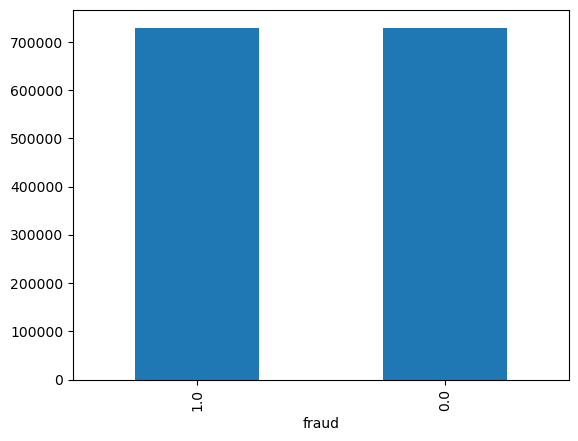

In [38]:
import matplotlib.pyplot as plt

fraud_plt = fraud_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [39]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [41]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)
pred = log_reg.predict(X_test_norm)
print(classification_report(y_pred = pred, y_true = y_test))



/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [6]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Over

ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X_train_norm, y_train)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_res, y_res)

# Predict and evaluate
y_pred = model.predict(X_test_norm)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    182615
           1       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [44]:
#UNDER

no_fraud_undersampled = resample(no_fraud,
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
290678,1.546756,-0.249092,0.677131,0.0,0.0,0.0,0.0,0.0
199161,0.056091,14.997002,-0.454292,0.0,0.0,0.0,0.0,0.0
238970,2.898063,1.369454,-0.438973,0.0,0.0,1.0,-1.0,0.0
500779,0.670810,-0.316393,-0.029382,0.0,1.0,0.0,0.0,0.0
251427,-0.078435,-0.214397,-0.245617,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
534039,-0.187252,1.616872,-0.174623,0.0,0.0,0.0,0.0,0.0
342411,0.980416,-0.256791,0.113196,0.0,0.0,0.0,0.0,0.0
400406,0.335148,-0.313584,-0.303199,0.0,0.0,0.0,-1.0,0.0
526304,-0.386732,-0.220772,3.499686,-1.0,1.0,0.0,-1.0,0.0


In [45]:
train_under = pd.concat([no_fraud_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
290678,1.546756,-0.249092,0.677131,0.0,0.0,0.0,0.0,0.0
199161,0.056091,14.997002,-0.454292,0.0,0.0,0.0,0.0,0.0
238970,2.898063,1.369454,-0.438973,0.0,0.0,1.0,-1.0,0.0
500779,0.670810,-0.316393,-0.029382,0.0,1.0,0.0,0.0,0.0
251427,-0.078435,-0.214397,-0.245617,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
799941,-0.252006,3.928048,10.433477,0.0,1.0,0.0,0.0,1.0
799947,4.900684,0.077877,-0.529795,0.0,0.0,0.0,0.0,1.0
799959,-0.129164,-0.275780,1.858073,0.0,0.0,0.0,0.0,1.0
799960,6.181005,-0.319484,-0.259345,0.0,0.0,0.0,0.0,1.0


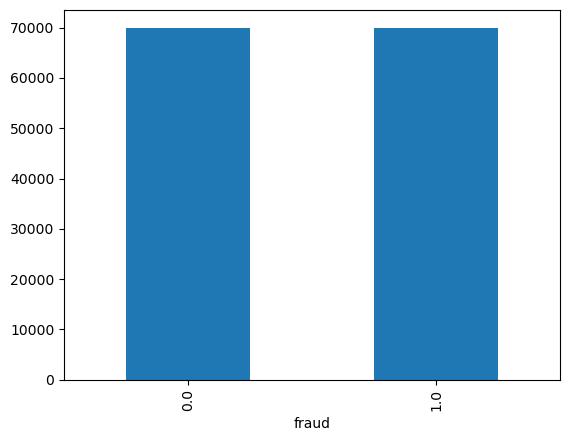

In [46]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [47]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [48]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [50]:
pred = log_reg.predict(X_test_norm)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [7]:
from imblearn.under_sampling import RandomUnderSampler

# Under

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train_norm, y_train)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_res, y_res)

# Predict and evaluate
y_pred = model.predict(X_test_norm)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.93      0.96    182615
           1       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [53]:
#SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [55]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_norm,y_train)

In [56]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [58]:
pred = log_reg.predict(X_test_norm)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [52]:
from imblearn.over_sampling import SMOTE

#SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_norm, y_train)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_res, y_res)

# Predict and evaluate
y_pred = model.predict(X_test_norm)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.72     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [12]:
from imblearn.over_sampling import SMOTE

#SMOTE

# Apply SMOTE
smote = SMOTE(random_state = 1,sampling_strategy=1.0)
X_res, y_res = smote.fit_resample(X_train_norm, y_train)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_res, y_res)

# Predict and evaluate
y_pred = model.predict(X_test_norm)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    182615
           1       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 